#**DESIGNING AND EVALUATING CLIMATE DERIVATIVES FOR RISK MITIGATION IN INVESTMENT PORTFOLIOS**


***TOLUWALONA TEMITOPE OLORO ***  	toluoloro2@gmail.com

##**PSEUDO CODE**

**Step 1:**

·Data Collection Adapt climate data archived from other websites such as NOAA, NASA, and ECMWF data.
· Put together the financial data for the securities that make up a portfolio (stocks, bonds, indices, etc.).
· Preprocess the data: Change climate data into understandable formats (e.g., converting temperatures into Celsius). Sync date and format of climate and financial datasets.

**Step 2:**

· Climate Risk Assessment Summarize climate data and descriptive statistics of mean, standard deviation of climate and major trends. Plot temperature data on graphs to observe a particular pattern. They should then identify climate volatility as a measure of systematic risk.


**Step 3:**

Design Derivative Choose the type of climate derivative it is to be, for example, the temperature-based call option or the catastrophe bond.
Define parameters for the derivative:

S: Average Temperature Currently (Current temperature index).
X: The threshold temperature of the above strike formula is also called strike temperature.
T: Time to maturity (in years).
r: Risk-free interest rate.
σ: Climate volatility.
 Implement a pricing formula: For options: Pricing of these derivatives can be done using Black-Scholes or any other model on derivatives. For catastrophe bonds: Organizations should incorporate either parametric or custom models.


**Step 4:**

· Ongoing climate change necessitates the modeling of future climate scenarios to guide the climate change mitigation plans.
· Generate a distribution of future temperatures using a normal distribution: Mean = Temperature of the area in the past.
· Standard deviation = Climate fluctuation. Compute derivative payoffs: If a call option: A Call option payoff Payoff=min⁡(Strike, Temperature)\text{Payoff} = \min(Strike, Temperature)Payoff=min(Strike,Temperature). Finally, approximate the expected payoff with the average of all the created simulations.


**Step 5:**

 Assessment of the integrated portfolio
 Define a sample portfolio with three assets:
·  Stocks: Distribute a higher amount, as a priority or an initial weight (for example 60%).
· Bonds: Distribute initial allocation (e.g., 30%), and all other decisions with respect to each module must correspond to principles of an ‘ideal architecture’.
· Climate Derivative: Set first weight proportion (e. g. 10%).
· Calculate portfolio metrics: Portfolio return = Σ ( Wi * Ri) Portfolio risk = Sum of individual risks weighted by portfolio’s exposure to each risk.
·Adjust portfolio weights to optimize risk-return characteristics: Boost derivative use if it leads to smaller total risk exposure on the portfolio.

**Step 6:**
· Visualization and Reporting Graph the daily and monthly simulated temperature distributions and the payoffs resulting from their derivative program.
·Illustrate the results of portfolio analysis (return against risk).
 Document findings: Derivative pricing results. Optimization trends and patterns of portfolio.


###**Step 1: Import Required Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm


###**Step 2: Load and Prepare Data**

**Download Climate Data from Online Sources:**

    NOAA Climate Data: https://www.ncdc.noaa.gov/cdo-web/
    NASA EarthData: https://earthdata.nasa.gov/
    European Centre for Medium-Range Weather Forecasts (ECMWF): https://www.ecmwf.int/

In [ ]:


# Generate date range for one year
date_range = pd.date_range(start='2023-01-01', end='2023-12-31', freq='D')

# Simulate daily temperatures (mean=25°C, std=5°C)
np.random.seed(42)  # For reproducibility
temperatures = np.random.normal(loc=25, scale=5, size=len(date_range))

# Create climate_data DataFrame
climate_data = pd.DataFrame({
    'Date': date_range,
    'Temperature': temperatures
})

# Save to CSV
climate_data.to_csv('climate_data.csv', index=False)

print(climate_data.head())


        Date  Temperature
0 2023-01-01    27.483571
1 2023-01-02    24.308678
2 2023-01-03    28.238443
3 2023-01-04    32.615149
4 2023-01-05    23.829233


In [ ]:
# Generate random walk for stock prices (start price = 100)
stock_prices = [100]  # Initial stock price
for _ in range(1, len(date_range)):
    stock_prices.append(stock_prices[-1] * (1 + np.random.normal(0, 0.01)))

# Generate random walk for bond prices (start price = 50, lower volatility)
bond_prices = [50]  # Initial bond price
for _ in range(1, len(date_range)):
    bond_prices.append(bond_prices[-1] * (1 + np.random.normal(0, 0.005)))

# Create financial_data DataFrame
financial_data = pd.DataFrame({
    'Date': date_range,
    'Stock_Price': stock_prices,
    'Bond_Price': bond_prices
})

# Save to CSV
financial_data.to_csv('financial_data.csv', index=False)

print(financial_data.head())


        Date  Stock_Price  Bond_Price
0 2023-01-01   100.000000   50.000000
1 2023-01-02    99.598780   49.805424
2 2023-01-03    99.821973   49.854195
3 2023-01-04    99.834543   49.610315
4 2023-01-05    99.932057   49.711582


In [ ]:


# Data preprocessing
climate_data['Date'] = pd.to_datetime(climate_data['Date'])
financial_data['Date'] = pd.to_datetime(financial_data['Date'])

# **EXPLORATORY DATA ANALYSIS (EDA)**

In [ ]:


# Summary statistics
print("Climate Data Summary Statistics:")
climate_data.describe()


Climate Data Summary Statistics:


,Temperature
count,365.000000
mean,25.049732
std,4.740255
min,8.793663
25%,21.733354
50%,25.291044
75%,28.128337
max,44.263657


In [ ]:
# Check for missing values
print("\nMissing Values in Climate Data:")
climate_data.isnull().sum()



Missing Values in Climate Data:


,0
Date,0
Temperature,0


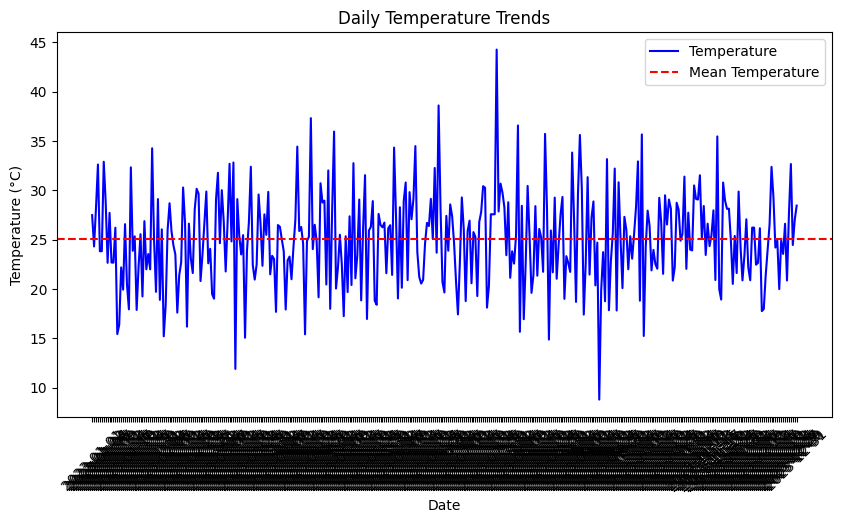

In [ ]:
# Plot temperature trends
plt.figure(figsize=(10, 5))
plt.plot(climate_data['Date'], climate_data['Temperature'], color='blue', label='Temperature')
plt.axhline(climate_data['Temperature'].mean(), color='red', linestyle='--', label='Mean Temperature')
plt.title("Daily Temperature Trends")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.xticks(rotation=45)
plt.show()

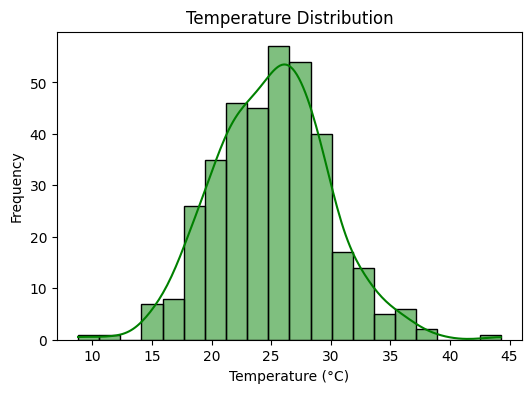

In [ ]:
# Temperature distribution
plt.figure(figsize=(6, 4))
sns.histplot(climate_data['Temperature'], bins=20, kde=True, color='green')
plt.title("Temperature Distribution")
plt.xlabel("Temperature (°C)")
plt.ylabel("Frequency")
plt.show()

In [ ]:

# Summary statistics
print("Financial Data Summary Statistics:")
financial_data.describe()


Financial Data Summary Statistics:


,Date,Stock_Price,Bond_Price
count,365,365.000000,365.000000
mean,2023-07-02 00:00:00,95.145327,55.733253
min,2023-01-01 00:00:00,85.592409,48.217841
25%,2023-04-02 00:00:00,88.694448,51.192978
50%,2023-07-02 00:00:00,92.977649,57.250612
75%,2023-10-01 00:00:00,101.274922,59.365253
max,2023-12-31 00:00:00,112.367110,62.862582
std,NaN,7.004636,4.410948


In [ ]:
# Check for missing values
print("\nMissing Values in Financial Data:")
print(financial_data.isnull().sum())




Missing Values in Financial Data:
Date           0
Stock_Price    0
Bond_Price     0
dtype: int64


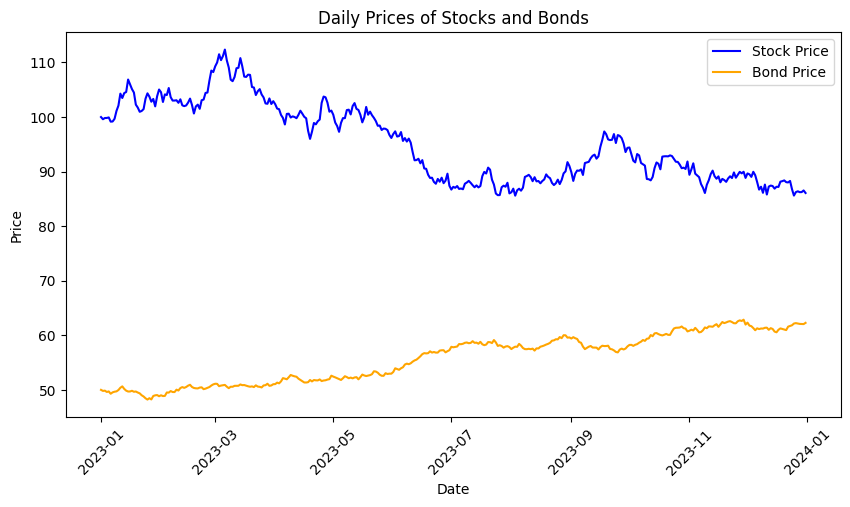

In [ ]:
# Plot stock and bond prices over time
plt.figure(figsize=(10, 5))
plt.plot(financial_data['Date'], financial_data['Stock_Price'], label='Stock Price', color='blue')
plt.plot(financial_data['Date'], financial_data['Bond_Price'], label='Bond Price', color='orange')
plt.title("Daily Prices of Stocks and Bonds")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.xticks(rotation=45)
plt.show()

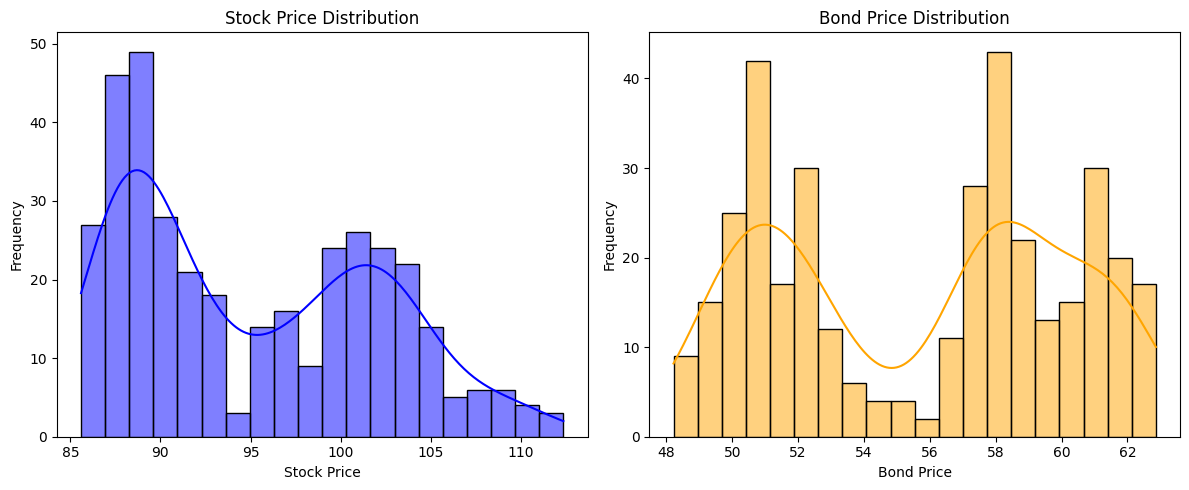

In [ ]:
# Distribution of stock and bond prices
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(financial_data['Stock_Price'], bins=20, kde=True, color='blue')
plt.title("Stock Price Distribution")
plt.xlabel("Stock Price")
plt.ylabel("Frequency")

plt.subplot(1, 2, 2)
sns.histplot(financial_data['Bond_Price'], bins=20, kde=True, color='orange')
plt.title("Bond Price Distribution")
plt.xlabel("Bond Price")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

###**Step 3: Model Climate Risk**

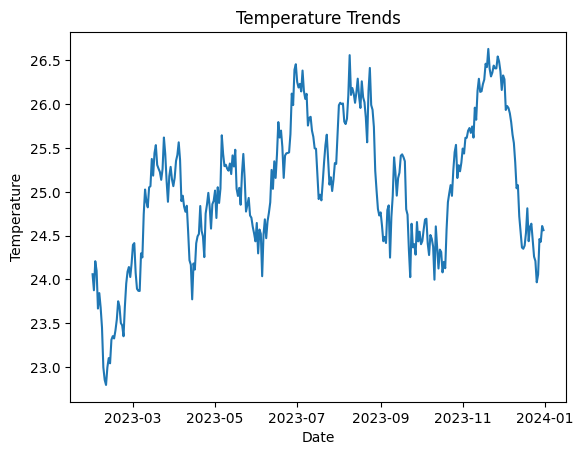

Climate Volatility: 4.740255447262639


In [ ]:
# Calculate rolling averages for temperature to detect trends
climate_data['Rolling_Temp'] = climate_data['Temperature'].rolling(window=30).mean()

# Visualize temperature trends
plt.plot(climate_data['Date'], climate_data['Rolling_Temp'])
plt.title('Temperature Trends')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.show()

# Calculate standard deviations for volatility assessment
climate_volatility = climate_data['Temperature'].std()
print(f"Climate Volatility: {climate_volatility}")


###**Step 4: Design and Price a Climate Derivative**

In [ ]:
# Define Black-Scholes formula
def black_scholes(S, X, T, r, sigma):
    d1 = (np.log(S / X) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    call_price = S * norm.cdf(d1) - X * np.exp(-r * T) * norm.cdf(d2)
    return call_price

# Parameters for the derivative
S = 30  # Current temperature index
X = 25  # Strike temperature
T = 1   # Time to maturity (in years)
r = 0.03  # Risk-free interest rate
sigma = climate_volatility  # Climate volatility as proxy for sigma

# Calculate derivative price
price = black_scholes(S, X, T, r, sigma)
print(f"Derivative Price: {price}")


Derivative Price: 29.52065320767161


###**Step 5: Back-Test Derivative Performance**

Expected Payoff: 1.4898804981996536


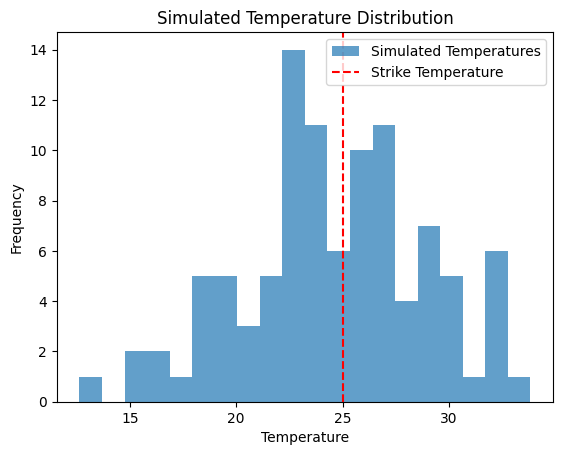

In [ ]:
# Simulate future temperatures
np.random.seed(42)
future_temps = np.random.normal(loc=climate_data['Temperature'].mean(), scale=climate_volatility, size=100)

# Calculate payoff for each scenario
payoffs = [max(temp - X, 0) for temp in future_temps]
expected_payoff = np.mean(payoffs)
print(f"Expected Payoff: {expected_payoff}")

# Visualize scenario outcomes
plt.hist(future_temps, bins=20, alpha=0.7, label='Simulated Temperatures')
plt.axvline(x=X, color='r', linestyle='--', label='Strike Temperature')
plt.title('Simulated Temperature Distribution')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.legend()
plt.show()


###**Step 6: Portfolio Optimization**

In [ ]:
# Example: Adjust portfolio weights
assets = ['Stock', 'Bond', 'Derivative']
weights = np.array([0.6, 0.3, 0.1])  # Initial weights
returns = np.array([0.08, 0.03, expected_payoff])  # Annualized returns
risk = np.array([0.2, 0.1, sigma])  # Standard deviations

# Portfolio return and risk
portfolio_return = np.dot(weights, returns)
portfolio_risk = np.sqrt(np.dot(weights ** 2, risk ** 2))
print(f"Portfolio Return: {portfolio_return}, Portfolio Risk: {portfolio_risk}")

# Adjust weights for optimal risk-return
weights[2] += 0.05  # Increase derivative allocation
print(f"Adjusted Weights: {weights}")

Portfolio Return: 0.20598804981996535, Portfolio Risk: 0.48989817008540787
Adjusted Weights: [0.6  0.3  0.15]
